In [357]:
import gym
import numpy as np
import hiive.mdptoolbox
from time import time
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Value Iteration

In [346]:
env_name = 'FrozenLake-v0'
env = gym.make(env_name)
env.render()


SFFF
FHFH
FFFH
HFFG


In [347]:
# value iteration
def value_iteration(env, gamma=1.0, max_iter=2000):
    values = np.zeros(env.nS)
    t_start = time()
    for i in range(max_iter):
        prev_v = np.copy(values)
        for s in range(env.nS):
            q_values = []
            for a in range(env.nA):
                next_rewards = [p*(r + prev_v[s]) for p, s, r, _ in env.P[s][a]]
                q_values.append(sum(next_rewards))
            values[s] = max(q_values)
        if (np.sum(np.fabs(prev_v - values)) <= eps):
            break
    t_end = time()
    return values, i+1, t_end - t_start

In [348]:
# extract policy
def extract_policy(values, gamma=1.0):
    policy = []
    for i in range(env.nS):
        q_values = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for next_sr in env.P[i][a]:
                p, s, r, _ = next_sr
                q_values[a] += (p * (r + gamma * values[s]))
        policy.append(np.argmax(q_values))
    return policy

In [349]:
def run_episode(env, policy, gamma=1.0, render=False):
    obs = env.reset()
    total_reward = 0
    idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done, info = env.step(int(policy[obs]))
        total_reward += (gamma ** idx * reward)
        idx += 1
        if done:
            break
    return total_reward


In [350]:
# gamma_list = list(np.linspace(1,10,10)/10)
# def create_plot_df(env, param_list, param, is_vi):
#     alg_name = 'value iteration' if is_vi else 'policy iteration'
#     columns = [alg_name, str(param), 'time spent', 'max iteration', 'reward']
#     df = pd.DataFrame(columns=columns)
#     print(param)
#     for idx in range(len(param_list)):
#         env = gym.make('FrozenLake-v0')
#         if str(param) != 'gamma':
#             gamma=1.0
#         else:
#             gamma=param_list[idx]
#         if is_vi:
#             values, max_iter, time_spent = value_iteration(env, param=param_list[idx])
#             policy = extract_policy(values, param=param_list[idx])
#         else:
#             policy, max_iter, time_spent = policy_iteration(env, param=param_list[idx])
#         scores = []
#         for i in range(100):
#             scores.append(run_episode(env, policy, gamma = gamma, render = False))
#         score = np.mean(scores)
#         df_temp = pd.DataFrame([alg_name, param_list[idx], time_spent, max_iter+1, score], columns = columns)
#         df = pd.concat([df, df_temp])
#     return df
# env = gym.make('FrozenLake-v0')
# create_plot_df(env, gamma_list, 'gamma', True)

In [351]:

values, max_iter, time_spent  = value_iteration(env)
policy = extract_policy(values)
scores = []
for i in range(100):
    scores.append(run_episode(env, policy, gamma = gamma, render = False))
print(np.mean(scores))
print('took {} iterations {:.2f} seconds'.format(max_iter, time_spent))

0.75
took 127 iterations 0.02 seconds


In [352]:

gamma_list = list(np.linspace(1,10,10)/10)
columns = ['env name', 'alg name', 'gamma', 'time', 'iteration', 'reward']
df_gamma = pd.DataFrame(columns=columns)
for idx in range(len(gamma_list)):
    # env = gym.make(env_name)
    env.reset()
    values, max_iter, time_spent = value_iteration(env, gamma=gamma_list[idx])
    policy = extract_policy(values, gamma=gamma_list[idx])
    scores = []
    for i in range(100):
        scores.append(run_episode(env, policy, gamma = gamma, render = False))
    score = np.mean(scores)
    df_temp = pd.DataFrame([[env_name, 'value iteration', gamma_list[idx], time_spent, max_iter, score]], columns = columns)
    df_gamma = pd.concat([df_gamma, df_temp])
df_gamma

,env name,alg name,gamma,time,iteration,reward
0,FrozenLake-v0,value iteration,0.1,0.025862,127,0.79
0,FrozenLake-v0,value iteration,0.2,0.026057,127,0.72
0,FrozenLake-v0,value iteration,0.3,0.022867,127,0.81
0,FrozenLake-v0,value iteration,0.4,0.024577,127,0.77
0,FrozenLake-v0,value iteration,0.5,0.024113,127,0.83
0,FrozenLake-v0,value iteration,0.6,0.025088,127,0.83
0,FrozenLake-v0,value iteration,0.7,0.024514,127,0.72
0,FrozenLake-v0,value iteration,0.8,0.022858,127,0.70
0,FrozenLake-v0,value iteration,0.9,0.022794,127,0.72
0,FrozenLake-v0,value iteration,1.0,0.022902,127,0.70


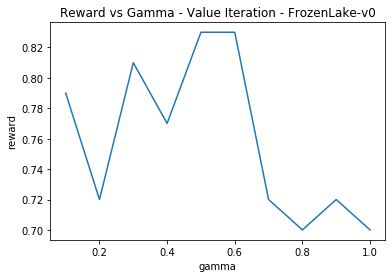

In [360]:
# df_gamma.plot(x='gamma', y='reward')
sns.lineplot(x='gamma', y='reward', data=df_gamma)
plt.title('Reward vs Gamma - Value Iteration - {}'.format(env_name))
plt.show()

In [361]:

max_iter_list = [10, 100, 500, 1000, 2000, 5000, 10000]
columns = ['env name', 'alg name', 'max_iter', 'time', 'iteration', 'reward']
df_max_iter = pd.DataFrame(columns=columns)
for idx in range(len(max_iter_list)):
#    env = gym.make('FrozenLake-v0')
    env.reset()
    values, max_iter, time_spent = value_iteration(env, max_iter=max_iter_list[idx])
    policy = extract_policy(values, gamma=gamma_list[idx])
    scores = []
    for i in range(100):
        scores.append(run_episode(env, policy, gamma = gamma, render = False))
    score = np.mean(scores)
    df_temp = pd.DataFrame([[env_name, 'value iteration', max_iter_list[idx], time_spent, max_iter, score]], columns = columns)
    df_max_iter = pd.concat([df_max_iter, df_temp])
df_max_iter

,env name,alg name,max_iter,time,iteration,reward
0,FrozenLake-v0,value iteration,10,0.002326,10,0.42
0,FrozenLake-v0,value iteration,100,0.021188,100,0.75
0,FrozenLake-v0,value iteration,500,0.026965,127,0.77
0,FrozenLake-v0,value iteration,1000,0.024301,127,0.72
0,FrozenLake-v0,value iteration,2000,0.023801,127,0.63
0,FrozenLake-v0,value iteration,5000,0.023137,127,0.68
0,FrozenLake-v0,value iteration,10000,0.023946,127,0.75


In [365]:
env_name = 'FrozenLake8x8-v0'
env = gym.make(env_name)
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [366]:

gamma_list = list(np.linspace(1,10,10)/10)
columns = ['env name', 'alg name', 'gamma', 'time', 'iteration', 'reward']
df_gamma = pd.DataFrame(columns=columns)
for idx in range(len(gamma_list)):
    # env = gym.make(env_name)
    env.reset()
    values, max_iter, time_spent = value_iteration(env, gamma=gamma_list[idx])
    policy = extract_policy(values, gamma=gamma_list[idx])
    scores = []
    for i in range(100):
        scores.append(run_episode(env, policy, gamma = gamma, render = False))
    score = np.mean(scores)
    df_temp = pd.DataFrame([[env_name, 'value iteration', gamma_list[idx], time_spent, max_iter, score]], columns = columns)
    df_gamma = pd.concat([df_gamma, df_temp])
df_gamma

,env name,alg name,gamma,time,iteration,reward
0,FrozenLake8x8-v0,value iteration,0.1,0.247268,323,0.88
0,FrozenLake8x8-v0,value iteration,0.2,0.254759,323,0.88
0,FrozenLake8x8-v0,value iteration,0.3,0.261267,323,0.94
0,FrozenLake8x8-v0,value iteration,0.4,0.250013,323,0.90
0,FrozenLake8x8-v0,value iteration,0.5,0.255098,323,0.88
0,FrozenLake8x8-v0,value iteration,0.6,0.241679,323,0.86
0,FrozenLake8x8-v0,value iteration,0.7,0.250231,323,0.90
0,FrozenLake8x8-v0,value iteration,0.8,0.253292,323,0.89
0,FrozenLake8x8-v0,value iteration,0.9,0.247007,323,0.89
0,FrozenLake8x8-v0,value iteration,1.0,0.253365,323,0.86


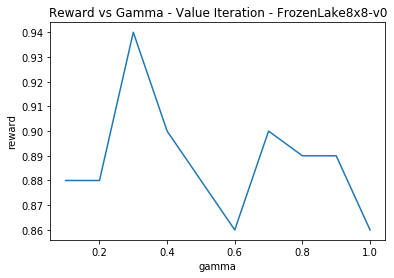

In [367]:
# df_gamma.plot(x='gamma', y='reward')
sns.lineplot(x='gamma', y='reward', data=df_gamma)
plt.title('Reward vs Gamma - Value Iteration - {}'.format(env_name))
plt.show()

In [368]:

max_iter_list = [10, 100, 500, 1000, 2000, 5000, 10000]
columns = ['env name', 'alg name', 'max_iter', 'time', 'iteration', 'reward']
df_max_iter = pd.DataFrame(columns=columns)
for idx in range(len(max_iter_list)):
#    env = gym.make('FrozenLake-v0')
    env.reset()
    values, max_iter, time_spent = value_iteration(env, max_iter=max_iter_list[idx])
    policy = extract_policy(values, gamma=gamma_list[idx])
    scores = []
    for i in range(100):
        scores.append(run_episode(env, policy, gamma = gamma, render = False))
    score = np.mean(scores)
    df_temp = pd.DataFrame([[env_name, 'value iteration', max_iter_list[idx], time_spent, max_iter, score]], columns = columns)
    df_max_iter = pd.concat([df_max_iter, df_temp])
df_max_iter

,env name,alg name,max_iter,time,iteration,reward
0,FrozenLake8x8-v0,value iteration,10,0.008756,10,0.06
0,FrozenLake8x8-v0,value iteration,100,0.089947,100,0.91
0,FrozenLake8x8-v0,value iteration,500,0.243915,323,0.86
0,FrozenLake8x8-v0,value iteration,1000,0.251983,323,0.89
0,FrozenLake8x8-v0,value iteration,2000,0.251067,323,0.87
0,FrozenLake8x8-v0,value iteration,5000,0.237564,323,0.84
0,FrozenLake8x8-v0,value iteration,10000,0.251018,323,0.90


# Policy Iteration

In [369]:
env_name = 'FrozenLake-v0'
env = gym.make(env_name)
env.render()


SFFF
FHFH
FFFH
HFFG


In [370]:
def compute_policy_value(env, policy, eps, gamma=1):
    values = np.zeros(env.nS)
    while True:
        prev = np.copy(values)
        for state in range(env.nS):
            policy_ = policy[state]
            values[state] = sum([p * (r + gamma * prev[s]) for p, s, r, _ in env.P[state][policy_]])
        if np.sum(np.fabs(prev - values)) <= eps:
            break
    return values

In [371]:
def extract_policy(values, gamma=1):
    policy = []
    for i in range(env.nS):
        q_values = np.zeros(env.nA)
        for a in range(env.nA):
            for next_sr in env.P[i][a]:
                p, s, r, _ = next_sr
                q_values[a] += (p * (r + gamma * values[s]))
        policy.append(np.argmax(q_values))
    return policy

In [372]:
def policy_iteration(env, gamma=1.0, eps=0.1, max_iter=1000):
    t_start = time()
    policy = list(np.random.choice(env.nA, size=env.nS))
    for i in range(max_iter):
        prev_policy_values = compute_policy_value(env, policy, eps, gamma)
        new_policy = extract_policy(prev_policy_values, gamma)
    #     print(policy)
    #     print(new_policy)
        if np.array_equal(policy, new_policy):
            break
        policy = new_policy[:]
    t_end = time()
    return policy, i+1, t_end-t_start


In [373]:
policy, max_iter, time_delta = policy_iteration(env)

scores = []
for i in range(100):
    scores.append(run_episode(env, policy, gamma = gamma, render = False))
print('Policy iteration took {} iterations, {:.2f} seconds to converge with reward {}'.format(max_iter, time_delta, np.mean(scores)))


Policy iteration took 4 iterations, 0.01 seconds to converge with reward 0.76


In [374]:
# how many iteration does it take to converge for value and policy iteration? 
# coompare time to converge. 
# number of states matter? 

In [375]:

gamma_list = list(np.linspace(1,10,10)/10)
columns = ['env name', 'alg name', 'gamma', 'time', 'iteration', 'reward']
df_gamma = pd.DataFrame(columns=columns)
for idx in range(len(gamma_list)):
    env.reset
    policy, max_iter, time_spent = policy_iteration(env, gamma=gamma_list[idx])
    scores = []
    for i in range(100):
        scores.append(run_episode(env, policy, gamma = gamma, render = False))
    score = np.mean(scores)
    df_temp = pd.DataFrame([[env_name, 'policy iteration', gamma_list[idx], time_spent, max_iter, score]], columns = columns)
    df_gamma = pd.concat([df_gamma, df_temp])

df_gamma

,env name,alg name,gamma,time,iteration,reward
0,FrozenLake-v0,policy iteration,0.1,0.001081,2,0.00
0,FrozenLake-v0,policy iteration,0.2,0.001832,4,0.00
0,FrozenLake-v0,policy iteration,0.3,0.000927,2,0.00
0,FrozenLake-v0,policy iteration,0.4,0.001546,3,0.22
0,FrozenLake-v0,policy iteration,0.5,0.001793,3,0.17
0,FrozenLake-v0,policy iteration,0.6,0.002529,4,0.28
0,FrozenLake-v0,policy iteration,0.7,0.001609,3,0.22
0,FrozenLake-v0,policy iteration,0.8,0.002396,4,0.42
0,FrozenLake-v0,policy iteration,0.9,0.002959,4,0.45
0,FrozenLake-v0,policy iteration,1.0,0.006596,6,0.75


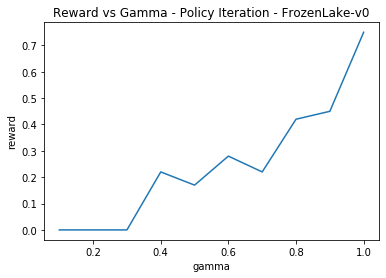

In [376]:
# df_gamma.plot(x='gamma', y='reward')
sns.lineplot(x='gamma', y='reward', data=df_gamma)
plt.title('Reward vs Gamma - Policy Iteration - {}'.format(env_name))
plt.show()

In [377]:

max_iter_list = [10, 100, 500, 1000, 2000, 5000, 10000]
columns = ['env name', 'alg name', 'max_iter', 'time', 'iteration', 'reward']
df_max_iter = pd.DataFrame(columns=columns)
for idx in range(len(max_iter_list)):
    env = gym.make('FrozenLake-v0')
    values, max_iter, time_spent = policy_iteration(env, max_iter=max_iter_list[idx])
    scores = []
    for i in range(100):
        scores.append(run_episode(env, policy, gamma = gamma, render = False))
    score = np.mean(scores)
    df_temp = pd.DataFrame([[env_name, 'policy iteration', max_iter_list[idx], time_spent, max_iter, score]], columns = columns)
    df_max_iter = pd.concat([df_max_iter, df_temp])

df_max_iter

,env name,alg name,max_iter,time,iteration,reward
0,FrozenLake-v0,policy iteration,10,0.006406,4,0.80
0,FrozenLake-v0,policy iteration,100,0.007125,5,0.72
0,FrozenLake-v0,policy iteration,500,0.004885,3,0.69
0,FrozenLake-v0,policy iteration,1000,0.005954,5,0.71
0,FrozenLake-v0,policy iteration,2000,0.006381,6,0.70
0,FrozenLake-v0,policy iteration,5000,0.003760,3,0.70
0,FrozenLake-v0,policy iteration,10000,0.003872,3,0.72


In [378]:
env_name = 'FrozenLake8x8-v0'
env = gym.make(env_name)
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [390]:

gamma_list = list(np.linspace(1,10,10)/10)
columns = ['env name', 'alg name', 'gamma', 'time', 'iteration', 'reward']
df_gamma = pd.DataFrame(columns=columns)
for idx in range(len(gamma_list)):
    env.reset
    policy, max_iter, time_spent = policy_iteration(env, gamma=gamma_list[idx])
    scores = []
    for i in range(100):
        scores.append(run_episode(env, policy, gamma = gamma, render = False))
    score = np.mean(scores)
    df_temp = pd.DataFrame([[env_name, 'policy iteration', gamma_list[idx], time_spent, max_iter, score]], columns = columns)
    df_gamma = pd.concat([df_gamma, df_temp])

df_gamma

,env name,alg name,gamma,time,iteration,reward
0,FrozenLake8x8-v0,policy iteration,0.1,0.007737,4,0.00
0,FrozenLake8x8-v0,policy iteration,0.2,0.005888,4,0.00
0,FrozenLake8x8-v0,policy iteration,0.3,0.007867,5,0.00
0,FrozenLake8x8-v0,policy iteration,0.4,0.004699,3,0.00
0,FrozenLake8x8-v0,policy iteration,0.5,0.007247,4,0.00
0,FrozenLake8x8-v0,policy iteration,0.6,0.008091,4,0.00
0,FrozenLake8x8-v0,policy iteration,0.7,0.009717,5,0.00
0,FrozenLake8x8-v0,policy iteration,0.8,0.011643,5,0.00
0,FrozenLake8x8-v0,policy iteration,0.9,0.025590,9,0.02
0,FrozenLake8x8-v0,policy iteration,1.0,0.152506,8,0.91


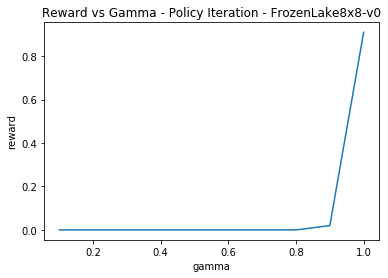

In [391]:
# df_gamma.plot(x='gamma', y='reward')
sns.lineplot(x='gamma', y='reward', data=df_gamma)
plt.title('Reward vs Gamma - Policy Iteration - {}'.format(env_name))
plt.show()

In [380]:

max_iter_list = [10, 100, 500, 1000, 2000, 5000, 10000]
columns = ['env name', 'alg name', 'max_iter', 'time', 'iteration', 'reward']
df_max_iter = pd.DataFrame(columns=columns)
for idx in range(len(max_iter_list)):
    env.reset
    values, max_iter, time_spent = policy_iteration(env, max_iter=max_iter_list[idx])
    scores = []
    for i in range(100):
        scores.append(run_episode(env, policy, gamma = gamma, render = False))
    score = np.mean(scores)
    df_temp = pd.DataFrame([[env_name, 'policy iteration', max_iter_list[idx], time_spent, max_iter, score]], columns = columns)
    df_max_iter = pd.concat([df_max_iter, df_temp])

df_max_iter

,env name,alg name,max_iter,time,iteration,reward
0,FrozenLake8x8-v0,policy iteration,10,0.195471,10,0.92
0,FrozenLake8x8-v0,policy iteration,100,0.174889,9,0.85
0,FrozenLake8x8-v0,policy iteration,500,0.095239,5,0.90
0,FrozenLake8x8-v0,policy iteration,1000,0.169453,9,0.90
0,FrozenLake8x8-v0,policy iteration,2000,0.175746,9,0.93
0,FrozenLake8x8-v0,policy iteration,5000,0.171746,8,0.84
0,FrozenLake8x8-v0,policy iteration,10000,0.184600,11,0.90


# Q Learning 

In [392]:
env_name = 'FrozenLake-v0'
env = gym.make(env_name)
env.render()


SFFF
FHFH
FFFH
HFFG


In [393]:
init_r = 1.0
min_r = 0.01
gamma = 1.0
t_max = 10000
eps = 0.01

In [394]:
# for i in range(max_iter):
#     obs = env.rest()
#     rewards = 0
#     eta = max(min_r, initial_r * (0.85 ** (1//100)))
#     for j in range(t_max):
#         a, b = obs_to_state

In [395]:
def q_learning(env, discount=0.9, max_iter=10000, alpha=0.1, decay_rate=0.01, min_epsilon=0.01):
    t_start = time()
    q_table = np.zeros((env.nS, env.nA))
    rewards = []
    epsilon = 1.0
    min_epi, max_epi = 1e-2, 1
    for i in range(max_iter):
        state = env.reset()
        step = 0
        done = False
        total = 0
        while True:
            if random.uniform(0,1) > epsilon:
                b = q_table[state, :]
                action = np.random.choice(np.where(b == b.max())[0])
            else:
                action = env.action_space.sample()
                
            new_state, reward, done, info = env.step(action)
            total += reward
            
            if not done:
                q_table[state, action] += alpha * (reward + gamma * np.max(q_table[new_state, :]) - q_table[state, action])
            else:
                q_table[state, action] += alpha * (reward - q_table[state, action])
                
            state = new_state
            
            if done: break
        rewards.append(total)
        epsilon = max(max_epi - (1/max_iter) * i, min_epi)
    t_end = time()
    delta_time = t_end - t_start
    return np.argmax(q_table, axis=1), i+1, delta_time
            

In [396]:

q_policy, q_solve_iter, q_solve_time = q_learning(env, max_iter=10000)
scores = []
for i in range(100):
    scores.append(run_episode(env, q_policy, gamma = gamma, render = False))
print(np.mean(scores))


0.72


In [397]:
q_solve_iter

10000

In [398]:

discount_list = list(np.linspace(1,10,10)/10)
columns = ['env name', 'alg name', 'discount', 'time', 'iteration', 'reward']
df_discount = pd.DataFrame(columns=columns)
for idx in range(len(discount_list)):
    env.reset()
    q_policy, q_solve_iter, q_solve_time = q_learning(env, discount=discount_list[idx])
    scores = []
    for i in range(100):
        scores.append(run_episode(env, q_policy, gamma = gamma, render = False))
    score = np.mean(scores)
    df_temp = pd.DataFrame([[env_name, 'Q-Learning', discount_list[idx], q_solve_time,q_solve_iter, score]], columns = columns)
    df_discount = pd.concat([df_discount, df_temp])
df_discount

,env name,alg name,discount,time,iteration,reward
0,FrozenLake-v0,Q-Learning,0.1,6.222654,10000,0.81
0,FrozenLake-v0,Q-Learning,0.2,6.189292,10000,0.71
0,FrozenLake-v0,Q-Learning,0.3,6.519154,10000,0.69
0,FrozenLake-v0,Q-Learning,0.4,6.497053,10000,0.75
0,FrozenLake-v0,Q-Learning,0.5,6.357758,10000,0.74
0,FrozenLake-v0,Q-Learning,0.6,6.393549,10000,0.77
0,FrozenLake-v0,Q-Learning,0.7,6.608003,10000,0.70
0,FrozenLake-v0,Q-Learning,0.8,6.574836,10000,0.52
0,FrozenLake-v0,Q-Learning,0.9,6.262807,10000,0.67
0,FrozenLake-v0,Q-Learning,1.0,6.750639,10000,0.78


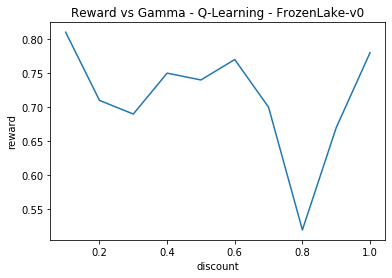

In [399]:
# df_gamma.plot(x='gamma', y='reward')
sns.lineplot(x='discount', y='reward', data=df_discount)
plt.title('Reward vs Gamma - Q-Learning - {}'.format(env_name))
plt.show()

In [400]:
max_iter_list = [10, 100, 500, 1000, 2000, 5000, 10000, 50000, 1000000]
columns = ['env name', 'alg name', 'max_iter', 'time', 'iteration', 'reward', 'std']
df_max_iter = pd.DataFrame(columns=columns)
for idx in range(len(max_iter_list)):
    env.reset
    q_policy, q_solve_iter, q_solve_time = q_learning(env, max_iter=max_iter_list[idx])
    scores = []
    for i in range(100):
        scores.append(run_episode(env, q_policy, gamma = gamma, render = False))
    score = np.mean(scores)
    std = np.std(scores)
    df_temp = pd.DataFrame([[env_name, 'Q-Learning', max_iter_list[idx], q_solve_time, q_solve_iter, score, std]], columns = columns)
    df_max_iter = pd.concat([df_max_iter, df_temp])

df_max_iter

,env name,alg name,max_iter,time,iteration,reward,std
0,FrozenLake-v0,Q-Learning,10,0.004311,10,0.00,0.000000
0,FrozenLake-v0,Q-Learning,100,0.037636,100,0.00,0.000000
0,FrozenLake-v0,Q-Learning,500,0.227966,500,0.11,0.312890
0,FrozenLake-v0,Q-Learning,1000,0.527552,1000,0.74,0.438634
0,FrozenLake-v0,Q-Learning,2000,1.164773,2000,0.75,0.433013
0,FrozenLake-v0,Q-Learning,5000,3.103286,5000,0.00,0.000000
0,FrozenLake-v0,Q-Learning,10000,6.443804,10000,0.78,0.414246
0,FrozenLake-v0,Q-Learning,50000,32.757586,50000,0.76,0.427083
0,FrozenLake-v0,Q-Learning,1000000,659.301966,1000000,0.56,0.496387


In [401]:

decay_list = list(np.linspace(1,10,10)/10)
columns = ['env name', 'alg name', 'decay rate', 'time', 'iteration', 'reward', 'std']
df_decay = pd.DataFrame(columns=columns)
for idx in range(len(decay_list)):
    env.reset()
    q_policy, q_solve_iter, q_solve_time = q_learning(env, decay_rate=decay_list[idx])
    scores = []
    std = []
    for i in range(100):
        scores.append(run_episode(env, q_policy, gamma = gamma, render = False))
    score = np.mean(scores)
    std = np.std(scores)
    df_temp = pd.DataFrame([[env_name, 'Q-Learning', decay_list[idx], q_solve_time, q_solve_iter, score, std]], columns = columns)
    df_decay = pd.concat([df_decay, df_temp])
df_decay

,env name,alg name,decay rate,time,iteration,reward,std
0,FrozenLake-v0,Q-Learning,0.1,6.413671,10000,0.78,0.414246
0,FrozenLake-v0,Q-Learning,0.2,6.440477,10000,0.57,0.495076
0,FrozenLake-v0,Q-Learning,0.3,6.460161,10000,0.73,0.443959
0,FrozenLake-v0,Q-Learning,0.4,6.334526,10000,0.00,0.000000
0,FrozenLake-v0,Q-Learning,0.5,6.666320,10000,0.74,0.438634
0,FrozenLake-v0,Q-Learning,0.6,6.342416,10000,0.78,0.414246
0,FrozenLake-v0,Q-Learning,0.7,6.411860,10000,0.63,0.482804
0,FrozenLake-v0,Q-Learning,0.8,6.273617,10000,0.00,0.000000
0,FrozenLake-v0,Q-Learning,0.9,6.438193,10000,0.79,0.407308
0,FrozenLake-v0,Q-Learning,1.0,6.430520,10000,0.73,0.443959


In [402]:

alpha_list = list(np.linspace(1,10,10)/10)
columns = ['env name', 'alg name', 'alpha', 'time', 'iteration', 'reward', 'std']
df_alpha = pd.DataFrame(columns=columns)
for idx in range(len(alpha_list)):
    env.reset()
    q_policy, q_solve_iter, q_solve_time = q_learning(env, alpha=alpha_list[idx])
    scores = []
    for i in range(100):
        scores.append(run_episode(env, q_policy, gamma = gamma, render = False))
    score = np.mean(scores)
    std = np.std(scores)
    df_temp = pd.DataFrame([[env_name, 'Q-Learning', alpha_list[idx], q_solve_time,q_solve_iter, score, std]], columns = columns)
    df_alpha = pd.concat([df_alpha, df_temp])
df_alpha

,env name,alg name,alpha,time,iteration,reward,std
0,FrozenLake-v0,Q-Learning,0.1,6.623158,10000,0.76,0.427083
0,FrozenLake-v0,Q-Learning,0.2,6.574029,10000,0.65,0.476970
0,FrozenLake-v0,Q-Learning,0.3,6.426147,10000,0.57,0.495076
0,FrozenLake-v0,Q-Learning,0.4,6.377959,10000,0.69,0.462493
0,FrozenLake-v0,Q-Learning,0.5,6.096217,10000,0.71,0.453762
0,FrozenLake-v0,Q-Learning,0.6,6.273100,10000,0.77,0.420833
0,FrozenLake-v0,Q-Learning,0.7,5.900461,10000,0.73,0.443959
0,FrozenLake-v0,Q-Learning,0.8,5.957150,10000,0.61,0.487750
0,FrozenLake-v0,Q-Learning,0.9,6.072356,10000,0.24,0.427083
0,FrozenLake-v0,Q-Learning,1.0,3.569259,10000,0.00,0.000000


In [339]:
env_name = 'FrozenLake8x8-v0'
env = gym.make(env_name)
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [340]:
discount_list = list(np.linspace(1,10,10)/10)
columns = ['env name', 'alg name', 'discount', 'time', 'iteration', 'reward']
df_discount = pd.DataFrame(columns=columns)
for idx in range(len(discount_list)):
    env.reset()
    q_policy, q_solve_iter, q_solve_time = q_learning(env, discount=discount_list[idx])
    scores = []
    for i in range(100):
        scores.append(run_episode(env, q_policy, gamma = gamma, render = False))
    score = np.mean(scores)
    df_temp = pd.DataFrame([[env_name, 'Q-Learning', discount_list[idx], q_solve_time,q_solve_iter, score]], columns = columns)
    df_discount = pd.concat([df_discount, df_temp])
df_discount

,env name,alg name,discount,time,iteration,reward
0,FrozenLake8x8-v0,Q-Learning,0.1,25.674151,10000,0.13
0,FrozenLake8x8-v0,Q-Learning,0.2,33.011460,10000,0.76
0,FrozenLake8x8-v0,Q-Learning,0.3,38.857234,10000,0.69
0,FrozenLake8x8-v0,Q-Learning,0.4,36.468290,10000,0.60
0,FrozenLake8x8-v0,Q-Learning,0.5,49.282546,10000,0.72
0,FrozenLake8x8-v0,Q-Learning,0.6,31.807088,10000,0.55
0,FrozenLake8x8-v0,Q-Learning,0.7,38.212074,10000,0.44
0,FrozenLake8x8-v0,Q-Learning,0.8,32.397559,10000,0.50
0,FrozenLake8x8-v0,Q-Learning,0.9,45.826362,10000,0.57
0,FrozenLake8x8-v0,Q-Learning,1.0,32.329326,10000,0.51


In [341]:
max_iter_list = [10, 100, 500, 1000, 2000, 5000, 10000, 50000, 1000000]
columns = ['env name', 'alg name', 'max_iter', 'time', 'iteration', 'reward']
df_max_iter = pd.DataFrame(columns=columns)
for idx in range(len(max_iter_list)):
    env.reset
    q_policy, q_solve_iter, q_solve_time = q_learning(env, max_iter=max_iter_list[idx])
    scores = []
    for i in range(100):
        scores.append(run_episode(env, q_policy, gamma = gamma, render = False))
    score = np.mean(scores)
    df_temp = pd.DataFrame([[env_name, 'Q-Learning', max_iter_list[idx], q_solve_time, q_solve_iter, score]], columns = columns)
    df_max_iter = pd.concat([df_max_iter, df_temp])

df_max_iter

,env name,alg name,max_iter,time,iteration,reward
0,FrozenLake8x8-v0,Q-Learning,10,0.016379,10,0.00
0,FrozenLake8x8-v0,Q-Learning,100,0.133056,100,0.00
0,FrozenLake8x8-v0,Q-Learning,500,0.592068,500,0.00
0,FrozenLake8x8-v0,Q-Learning,1000,1.551965,1000,0.14
0,FrozenLake8x8-v0,Q-Learning,2000,2.862231,2000,0.08
0,FrozenLake8x8-v0,Q-Learning,5000,13.993213,5000,0.50
0,FrozenLake8x8-v0,Q-Learning,10000,33.684036,10000,0.02
0,FrozenLake8x8-v0,Q-Learning,50000,156.741194,50000,0.42
0,FrozenLake8x8-v0,Q-Learning,1000000,3057.378755,1000000,0.74


In [342]:

decay_list = list(np.linspace(1,10,10)/10)
columns = ['env name', 'alg name', 'decay rate', 'time', 'iteration', 'reward']
df_decay = pd.DataFrame(columns=columns)
for idx in range(len(decay_list)):
    env.reset()
    q_policy, q_solve_iter, q_solve_time = q_learning(env, decay_rate=decay_list[idx])
    scores = []
    for i in range(100):
        scores.append(run_episode(env, q_policy, gamma = gamma, render = False))
    score = np.mean(scores)
    df_temp = pd.DataFrame([[env_name, 'Q-Learning', decay_list[idx], q_solve_time, q_solve_iter, score]], columns = columns)
    df_decay = pd.concat([df_decay, df_temp])
df_decay

,env name,alg name,decay rate,time,iteration,reward
0,FrozenLake8x8-v0,Q-Learning,0.1,24.919567,10000,0.13
0,FrozenLake8x8-v0,Q-Learning,0.2,25.436098,10000,0.25
0,FrozenLake8x8-v0,Q-Learning,0.3,25.095263,10000,0.05
0,FrozenLake8x8-v0,Q-Learning,0.4,25.666563,10000,0.68
0,FrozenLake8x8-v0,Q-Learning,0.5,26.974199,10000,0.34
0,FrozenLake8x8-v0,Q-Learning,0.6,26.307298,10000,0.44
0,FrozenLake8x8-v0,Q-Learning,0.7,26.076205,10000,0.79
0,FrozenLake8x8-v0,Q-Learning,0.8,25.244010,10000,0.57
0,FrozenLake8x8-v0,Q-Learning,0.9,25.442595,10000,0.82
0,FrozenLake8x8-v0,Q-Learning,1.0,25.410610,10000,0.15
